### Import libraries 

In [9]:
#per creare rete
import pandas as pd
from extract import Count, SocialETL, SocialDB
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

In [10]:
m = SocialDB(100)

{
    'proukr': ['slavaukraine', 'istandwithukraine', 'endgunviolence', 'slavaukraini'],
    'pax': ['message', 'fact', 'putinhitler', 'stopwarinukraine'],
    'prorus': ['istandwithputin']
}

query: '#slavaukraine OR #istandwithukraine OR #endgunviolence OR #slavaukraini OR #message 
OR #fact OR #putinhitler OR #stopwarinukraine OR #istandwithputin'

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

In [11]:
m.df.index

Index(['1012453968679559168', '1020694951980511233', '1025553884901765120',
       '1034473588789784576', '1039554628088680449', '1050479861318512640',
       '1053900021580599296', '105914164', '1060530866', '1065955059677061121',
       ...
       '947125515516858369', '954140023506563073', '96288369',
       '966399979182002176', '967621872924815365', '977659098106880000',
       '979915002843820033', '981232209859305473', '982297651034009600',
       '985972898925039618'],
      dtype='object', name='author_id', length=360)

In [12]:
m.df["id"] = m.df.index
m.df["class"]

author_id
1012453968679559168    proukr
1020694951980511233    proukr
1025553884901765120       pax
1034473588789784576       pax
1039554628088680449    proukr
                        ...  
977659098106880000     proukr
979915002843820033     proukr
981232209859305473        pax
982297651034009600     proukr
985972898925039618     proukr
Name: class, Length: 360, dtype: category
Categories (3, object): ['pax', 'prorus', 'proukr']

In [63]:
id_user=[]
cat=[]
for e in m.df.iterrows():
    id_user.append(e[0])
for c in m.df['class']:
    cat.append((c))

In [64]:
df_nodes=pd.DataFrame({'id': id_user,
                      'cat': cat})
df_nodes

,id,cat
0,1012453968679559168,proukr
1,1020694951980511233,proukr
2,1025553884901765120,pax
3,1034473588789784576,pax
4,1039554628088680449,proukr
...,...,...
355,977659098106880000,proukr
356,979915002843820033,proukr
357,981232209859305473,pax
358,982297651034009600,proukr


In [65]:
G = nx.Graph()

In [66]:
#categoria, 'author.location', 'author.verified', 
for i, e in enumerate(df_nodes['id']):
    G.add_node(e, cat=df_nodes['cat'][i])

In [67]:
list(G.nodes.data()) #we can use all the operation about dictionary on these attributes

[('1012453968679559168', {'cat': 'proukr'}),
 ('1020694951980511233', {'cat': 'proukr'}),
 ('1025553884901765120', {'cat': 'pax'}),
 ('1034473588789784576', {'cat': 'pax'}),
 ('1039554628088680449', {'cat': 'proukr'}),
 ('1050479861318512640', {'cat': 'proukr'}),
 ('1053900021580599296', {'cat': 'pax'}),
 ('105914164', {'cat': 'proukr'}),
 ('1060530866', {'cat': 'proukr'}),
 ('1065955059677061121', {'cat': 'proukr'}),
 ('1075581830', {'cat': 'proukr'}),
 ('1092470563417849857', {'cat': 'pax'}),
 ('1105164472619012096', {'cat': 'proukr'}),
 ('1110611190118604800', {'cat': 'pax'}),
 ('1118179121958248448', {'cat': 'pax'}),
 ('1122454814800039937', {'cat': 'proukr'}),
 ('112524510', {'cat': 'proukr'}),
 ('1129210981', {'cat': 'proukr'}),
 ('1129812268663934977', {'cat': 'proukr'}),
 ('1133780401472692224', {'cat': 'proukr'}),
 ('1141930884', {'cat': 'proukr'}),
 ('1142526678', {'cat': 'proukr'}),
 ('1143435013', {'cat': 'proukr'}),
 ('1146519301446197248', {'cat': 'proukr'}),
 ('114909660

In [68]:
#m.edges

In [69]:
#edges = [(x["from"], x["to"]) for x in m.edges]
#print(edges)

In [76]:
import random
for i in range(300):
    u = random.choice(id_user)
    v = random.choice(id_user)
    G.add_edge(u, v)

In [77]:
#G.add_edges_from(edges)

In [78]:
G.number_of_edges()

499

In [79]:
G.number_of_nodes()

342

In [74]:
G.remove_nodes_from(list(nx.isolates(G)))

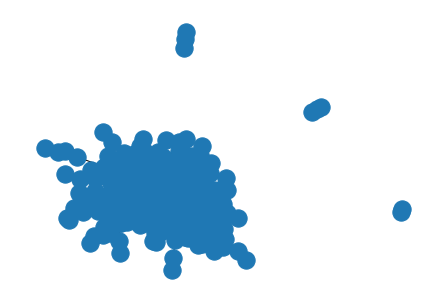

In [80]:
nx.draw(G)

In [81]:
list(G.nodes.data())

[('1012453968679559168', {'cat': 'proukr'}),
 ('1020694951980511233', {'cat': 'proukr'}),
 ('1025553884901765120', {'cat': 'pax'}),
 ('1050479861318512640', {'cat': 'proukr'}),
 ('1075581830', {'cat': 'proukr'}),
 ('1105164472619012096', {'cat': 'proukr'}),
 ('1110611190118604800', {'cat': 'pax'}),
 ('1118179121958248448', {'cat': 'pax'}),
 ('1122454814800039937', {'cat': 'proukr'}),
 ('1129210981', {'cat': 'proukr'}),
 ('1129812268663934977', {'cat': 'proukr'}),
 ('1133780401472692224', {'cat': 'proukr'}),
 ('1141930884', {'cat': 'proukr'}),
 ('1143435013', {'cat': 'proukr'}),
 ('1146519301446197248', {'cat': 'proukr'}),
 ('114909660', {'cat': 'proukr'}),
 ('1149763072975917056', {'cat': 'pax'}),
 ('1159260728894873602', {'cat': 'pax'}),
 ('1162892715396177921', {'cat': 'proukr'}),
 ('1175573460334055424', {'cat': 'proukr'}),
 ('1184581827064786944', {'cat': 'proukr'}),
 ('119044537', {'cat': 'pax'}),
 ('1190808557479968768', {'cat': 'proukr'}),
 ('1198774040011386881', {'cat': 'pax'}

# Community discovery algorithms

# Label Propagation

In [82]:
label_prop = algorithms.label_propagation(G)
label_prop.method_name

'Label Propagation'

In [83]:
label_prop_com=label_prop.communities
communities=[]

for i, c in enumerate(label_prop_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[{0: ({'pax': 4}, {'proukr': 14}, {'nocare': 0}, {'prorus': 0})},
 {1: ({'pax': 8}, {'proukr': 6}, {'nocare': 0}, {'prorus': 0})},
 {2: ({'pax': 3}, {'proukr': 7}, {'nocare': 0}, {'prorus': 0})},
 {3: ({'pax': 2}, {'proukr': 6}, {'nocare': 0}, {'prorus': 0})},
 {4: ({'pax': 3}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {5: ({'pax': 3}, {'proukr': 4}, {'nocare': 0}, {'prorus': 0})},
 {6: ({'pax': 0}, {'proukr': 7}, {'nocare': 0}, {'prorus': 0})},
 {7: ({'pax': 2}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {8: ({'pax': 1}, {'proukr': 4}, {'nocare': 0}, {'prorus': 1})},
 {9: ({'pax': 2}, {'proukr': 4}, {'nocare': 0}, {'prorus': 0})},
 {10: ({'pax': 3}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {11: ({'pax': 3}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {12: ({'pax': 1}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {13: ({'pax': 2}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {14: ({'pax': 2}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {15: ({'pax': 0}, 

In [84]:
print(len(label_prop.communities))

97

In [85]:
label_prop.overlap

False

In [86]:
label_prop.node_coverage

1.0

In [87]:
label_prop.to_json()

'{"communities": [["164034606", "759512167351775233", "3158525277", "1209443726", "375317476", "1175573460334055424", "212082298", "30985230", "1537230940207910913", "1540874051903684610", "1450148451417739265", "2291526088", "726574395288883201", "2268282037", "335526939", "888907268304945152", "17606181", "1417463171279986689"], ["4849737502", "1025553884901765120", "1118179121958248448", "1458997139732840451", "1898036371", "1267786441", "1681141826", "1110611190118604800", "1494531541002854401", "55328861", "233213435", "4422932596", "1421461796234403848", "2437468310"], ["1280342023212535808", "346059606", "3132149512", "966399979182002176", "555227531", "1515098223354183680", "1508805350820089861", "898890382251098112", "93469627", "15877452"], ["1502394564585439239", "1440946197166903297", "167844726", "1129812268663934977", "1462315750840954885", "464860240", "1050479861318512640", "463061109"], ["162561005", "410103064", "1184581827064786944", "1319361465468465159", "331241774

# Louvain 

In [88]:
#Leiden algorithm is an improvement of the Louvain algorithm
louvain = algorithms.leiden(G)
louvain.method_name 

'Leiden'

In [89]:
#Clustering parameters
louvain.method_parameters 

{'initial_membership': None, 'weights': None}

In [90]:
louvain_com=louvain.communities
communities=[]

for i, c in enumerate(louvain_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[{0: ({'pax': 6}, {'proukr': 28}, {'nocare': 0}, {'prorus': 1})},
 {1: ({'pax': 8}, {'proukr': 26}, {'nocare': 0}, {'prorus': 0})},
 {2: ({'pax': 5}, {'proukr': 23}, {'nocare': 0}, {'prorus': 0})},
 {3: ({'pax': 5}, {'proukr': 23}, {'nocare': 0}, {'prorus': 0})},
 {4: ({'pax': 7}, {'proukr': 16}, {'nocare': 0}, {'prorus': 0})},
 {5: ({'pax': 7}, {'proukr': 16}, {'nocare': 0}, {'prorus': 0})},
 {6: ({'pax': 8}, {'proukr': 14}, {'nocare': 0}, {'prorus': 0})},
 {7: ({'pax': 3}, {'proukr': 17}, {'nocare': 0}, {'prorus': 1})},
 {8: ({'pax': 7}, {'proukr': 13}, {'nocare': 0}, {'prorus': 0})},
 {9: ({'pax': 6}, {'proukr': 14}, {'nocare': 0}, {'prorus': 0})},
 {10: ({'pax': 4}, {'proukr': 16}, {'nocare': 0}, {'prorus': 0})},
 {11: ({'pax': 5}, {'proukr': 12}, {'nocare': 0}, {'prorus': 0})},
 {12: ({'pax': 4}, {'proukr': 13}, {'nocare': 0}, {'prorus': 0})},
 {13: ({'pax': 7}, {'proukr': 8}, {'nocare': 0}, {'prorus': 0})},
 {14: ({'pax': 5}, {'proukr': 6}, {'nocare': 0}, {'prorus': 0})},
 {15: (

In [91]:
#veirfy if the clustering overlap or not
louvain.overlap 

False

In [92]:
#percentage of node covered by the clustering
louvain.node_coverage 

1.0

In [93]:
#json representation of the results
louvain.to_json()

'{"communities": [["1110611190118604800", "1175573460334055424", "1209443726", "1241893658162421761", "1385980674", "1417463171279986689", "1419326759682592769", "1481354456545447936", "1490299731683196930", "1540874051903684610", "162561005", "164034606", "233657446", "2580841926", "281239831", "300965033", "3158525277", "386111756", "397080021", "759512167351775233", "829597064829005824", "947125515516858369", "982297651034009600", "2174567323", "1486724096054292488", "856727453502517249", "2808650785", "801243422619267072", "798639990", "383500278", "1513900847926808585", "23227891", "4422932596", "4651771706", "888907268304945152"], ["1012453968679559168", "1020694951980511233", "1118179121958248448", "1159260728894873602", "1315404200617168898", "1321943002013728768", "1408188414", "1425301388951756802", "1458997139732840451", "1462949948568317958", "1468215788679147521", "1494531541002854401", "1494625072627257345", "1499102680022609920", "1518649400326639616", "229175956", "2508

# Girvan Newman

In [94]:
girvan_newman=algorithms.girvan_newman(G, level=4)

In [95]:
girvan_com=girvan_newman.communities
communities=[]

for i, c in enumerate(girvan_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[{0: ({'pax': 62}, {'proukr': 161}, {'nocare': 0}, {'prorus': 2})},
 {1: ({'pax': 7}, {'proukr': 43}, {'nocare': 0}, {'prorus': 0})},
 {2: ({'pax': 13}, {'proukr': 23}, {'nocare': 0}, {'prorus': 0})},
 {3: ({'pax': 3}, {'proukr': 9}, {'nocare': 0}, {'prorus': 0})},
 {4: ({'pax': 2}, {'proukr': 9}, {'nocare': 0}, {'prorus': 0})},
 {5: ({'pax': 0}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {6: ({'pax': 1}, {'proukr': 2}, {'nocare': 0}, {'prorus': 0})},
 {7: ({'pax': 0}, {'proukr': 2}, {'nocare': 0}, {'prorus': 0})}]

In [98]:
girvan_newman.overlap

False

In [99]:
girvan_newman.node_coverage

1.0

In [100]:
girvan_newman.to_json()

'{"communities": [["1485959863155175427", "346059606", "1365738627398008837", "1203422797797744640", "827607635142717442", "18258999", "982297651034009600", "1250617333044797440", "1239011486980345856", "1110611190118604800", "3805232420", "93469627", "304567381", "261927509", "114909660", "1280342023212535808", "272655302", "1319361465468465159", "750771863702282240", "1209443726", "2192010002", "4422932596", "1419326759682592769", "898890382251098112", "1321943002013728768", "1417291166224207872", "2174567323", "818155572", "1240794705929142272", "1244646894", "166408358", "1141930884", "3132149512", "856727453502517249", "15914429", "2444560831", "1365069116", "1482058187117314051", "281239831", "356359868", "628660825", "397080021", "1499102680022609920", "1515098223354183680", "1540874051903684610", "1357342237", "131953680", "1322260333415858176", "1327696998368161792", "1439941102719705093", "1292999566510510080", "1105164472619012096", "305048007", "287664087", "42629597", "177

# Angel 

In [113]:
angel= algorithms.angel(G, threshold=0)#min_com_size=3

In [114]:
angel.method_parameters

{'threshold': 0, 'min_community_size': 3}

In [115]:
angel_com=angel.communities
communities=[]

for i, c in enumerate(angel_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[]

In [116]:
angel.overlap

True

In [117]:
angel.node_coverage

0.0

In [118]:
angel.to_json()

'{"communities": [], "algorithm": "ANGEL", "params": {"threshold": 0, "min_community_size": 3}, "overlap": true, "coverage": 0.0}'

# Community Visualization

In [119]:
pos = nx.spring_layout(G)

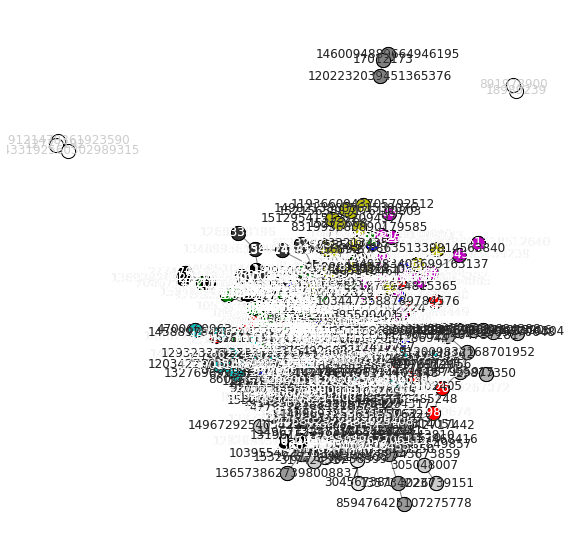

In [120]:
viz.plot_network_clusters(G, louvain, pos, figsize=(10, 10), plot_labels=True)
#viz.plot_network_clusters(G,louvain, pos) visualizzazione alternativa

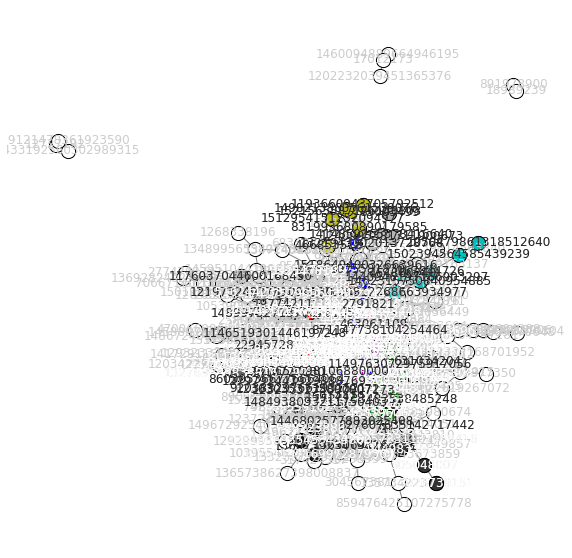

In [121]:
viz.plot_network_clusters(G, label_prop, pos, figsize=(10, 10), plot_labels=True)

In [122]:
viz.plot_network_clusters(G, angel, pos, figsize=(10, 10), plot_labels=True)

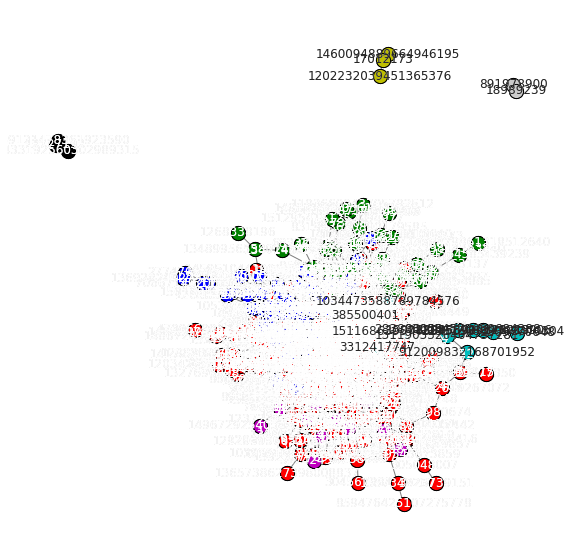

In [123]:
viz.plot_network_clusters(G, girvan_newman, pos, figsize=(10, 10), plot_labels=True)

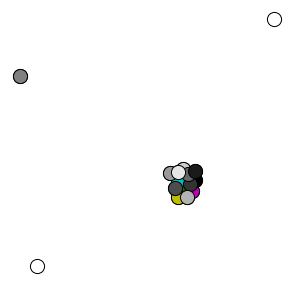

In [124]:
viz.plot_community_graph(G, louvain, figsize=(5, 5))

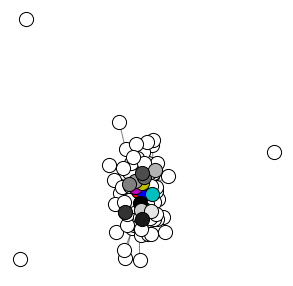

In [125]:
viz.plot_community_graph(G, label_prop, figsize=(5, 5))

In [126]:
viz.plot_community_graph(G, angel, figsize=(5, 5))

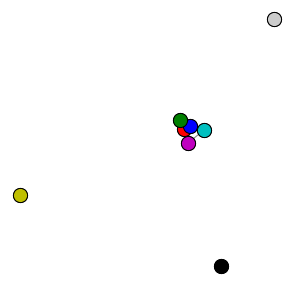

In [127]:
viz.plot_community_graph(G, girvan_newman, figsize=(5, 5))

# Community Internal Evaluation

In [128]:
print('Average Node Degree:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.average_internal_degree(),label_prop.average_internal_degree(),girvan_newman.average_internal_degree(),angel.average_internal_degree()))
print('Internal Edge Density:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.internal_edge_density(),label_prop.internal_edge_density(),girvan_newman.internal_edge_density(),angel.internal_edge_density()))
print('Modularity:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.modularity_density(),label_prop.modularity_density(),girvan_newman.modularity_density(),angel.modularity_density()))
print('Conductance:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.conductance(),label_prop.conductance(),girvan_newman.conductance(), angel.conductance()))


ValueError: min() arg is an empty sequence

### Community fitness/comparison visualization

<AxesSubplot:xlabel='Algorithm', ylabel='average_internal_degree'>

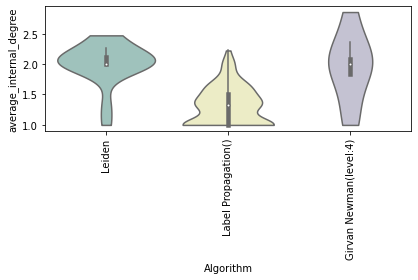

In [132]:
viz.plot_com_stat([louvain, label_prop, angel, girvan_newman], evaluation.average_internal_degree)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

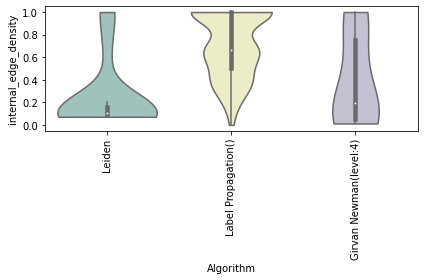

In [129]:
viz.plot_com_stat([louvain, label_prop, angel, girvan_newman], evaluation.internal_edge_density)

In [133]:
viz.plot_com_stat([louvain, label_prop, angel, girvan_newman], evaluation.modularity_density)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<AxesSubplot:xlabel='Algorithm', ylabel='conductance'>

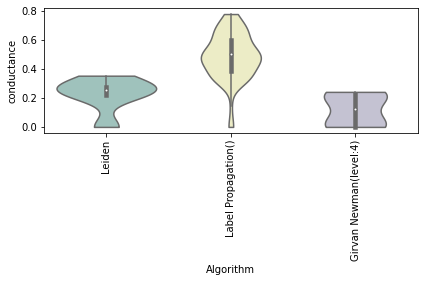

In [134]:
viz.plot_com_stat([louvain, label_prop, angel, girvan_newman], evaluation.conductance)

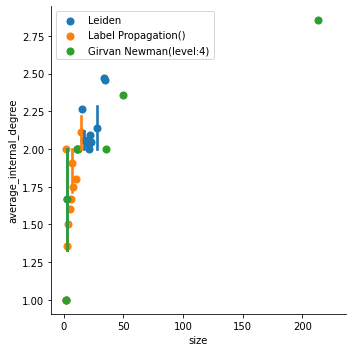

In [136]:
viz.plot_com_properties_relation([louvain, label_prop, angel, girvan_newman], evaluation.size, evaluation.average_internal_degree)

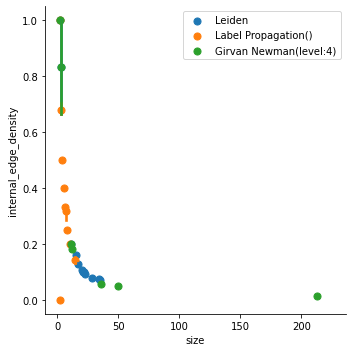

In [135]:
viz.plot_com_properties_relation([louvain, label_prop, angel, girvan_newman], evaluation.size, evaluation.internal_edge_density)

In [137]:
viz.plot_com_properties_relation([louvain, label_prop, angel, girvan_newman], evaluation.size, evaluation.modularity_density)

IndexError: tuple index out of range

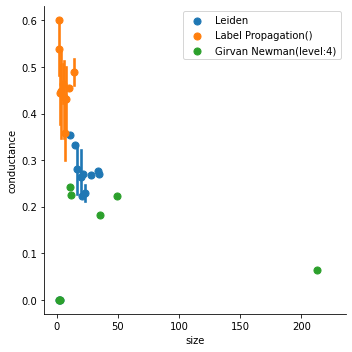

In [138]:
viz.plot_com_properties_relation([louvain, label_prop, angel, girvan_newman], evaluation.size, evaluation.conductance)

In [ ]:
### Qualitative evaluation: da rivedere

# Community Comparison

In [139]:
louvain.normalized_mutual_information(label_prop)

MatchingResult(score=0.6496230057153295, std=None)

In [140]:
girvan_newman.normalized_mutual_information(label_prop)

MatchingResult(score=0.35461887910729045, std=None)

In [141]:
evaluation.normalized_mutual_information(louvain, girvan_newman)

MatchingResult(score=0.4171167537888527, std=None)

In [142]:
evaluation.normalized_mutual_information(louvain, label_prop)

MatchingResult(score=0.6496230057153295, std=None)

In [143]:
evaluation.normalized_mutual_information(girvan_newman, label_prop)

MatchingResult(score=0.35461887910729045, std=None)

# Ground Truth (External) evaluation

<AxesSubplot:xlabel='graph', ylabel='score'>

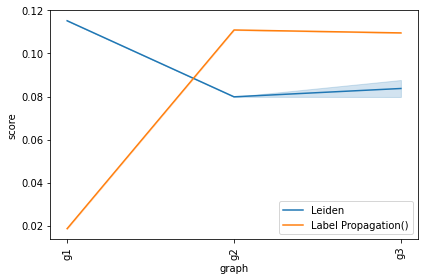

In [144]:
g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

# building the NodeClustering ground truth for the graphs
for G in graphs:
    ground_truth = NodeClustering(communities={frozenset(G.nodes[v]['community']) for v in G}, graph=G, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

In [146]:
lp_coms = algorithms.label_propagation(G)
leiden_coms = algorithms.leiden(G)
wp_coms = algorithms.walktrap(G)
infomap_coms = algorithms.infomap(G)

viz.plot_sim_matrix([leiden_coms, lp_coms, wp_coms, infomap_coms],evaluation.adjusted_mutual_information)

ModuleNotFoundError: Optional dependency not satisfied: install package wurlitzer to use infomap.